# Visualising the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load the dataframes from Excel files. We do this for the 'Categories' data and the cleaned dataset

The Excel files used were cleaned and prepared in preparation for the visualisation of the data.

In [2]:
clean_df = pd.read_excel('cleaned.xlsx')

In [3]:
categories = pd.read_excel('category_scores.xlsx')

## Create a Bar Chart showing all the categories and their scores

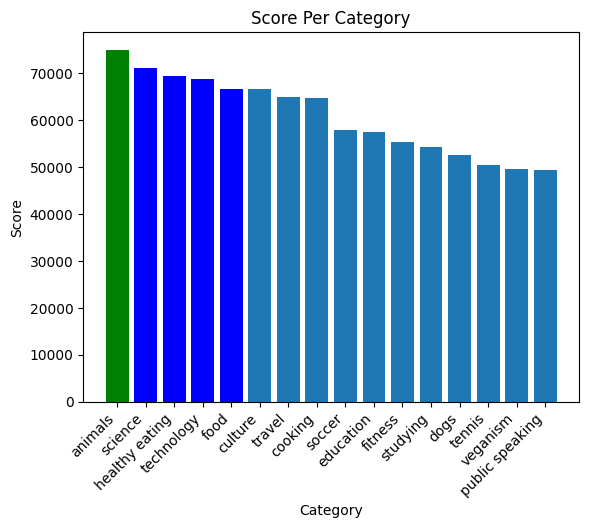

In [4]:


# sort the dataframe by score in descending order and select top five rows
top_five = categories.sort_values('Score', ascending=False).head(5)

# create a list of colors for the top five bars
colors = ['green', 'blue', 'blue', 'blue', 'blue']

# create the bar chart
plt.bar(categories['Category'], categories['Score'])

# loop through each bar and set color for top five bars
for i, category in categories.iterrows():
    if category['Category'] in top_five['Category'].tolist():
        plt.bar(i, category['Score'], color=colors[top_five[top_five['Category'] == category['Category']].index[0]])


# add labels and title
plt.xlabel('Category')
plt.ylabel('Score')
plt.title('Score Per Category')
plt.xticks(range(len(categories['Category'])), categories['Category'], rotation=45, ha='right')
# display chart
plt.show()

In [5]:
clean_df

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying,positive,30
...,...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,technology,negative,10
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,technology,positive,45
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,audio,technology,positive,30
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,technology,negative,12


In [6]:
counts = clean_df['Category'].value_counts()
counts

animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: Category, dtype: int64

#### The most popular content type is photo, closely followed by video, GIF and audio. There is a spread of 510 between the number of photos and GIF's posted

In [7]:
pop_cont = counts = clean_df['Content Type'].value_counts()
pop_cont

photo    6589
video    6245
GIF      6079
audio    5660
Name: Content Type, dtype: int64

## Determining the number of reactions to the most popular category

The most popular category was 'animals' with 1897 reactions.

In [8]:
most_pop = clean_df['Category'].value_counts()
most_pop = most_pop.to_frame()
most_pop = most_pop.rename(columns={'': 'Category', 'Category': 'Number of Reactions'})
most_pop

,Number of Reactions
animals,1897
science,1796
healthy eating,1717
food,1699
technology,1698
culture,1676
cooking,1664
travel,1647
soccer,1457
education,1433


# Deeper look at the 'animals' category.

The first step is to isolate all the reactions with a category of 'animals'.


In [9]:
animals_df = clean_df[clean_df['Category'] == 'animals']
animals_df

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
910,07f88a73-aef2-45fd-8b5d-418e448b853d,cherish,2021-03-12 16:22:28,GIF,animals,positive,70
911,07f88a73-aef2-45fd-8b5d-418e448b853d,intrigued,2020-10-17 10:20:24,GIF,animals,positive,45
912,07f88a73-aef2-45fd-8b5d-418e448b853d,like,2020-12-19 16:42:35,GIF,animals,positive,50
913,07f88a73-aef2-45fd-8b5d-418e448b853d,love,2021-05-31 05:46:59,GIF,animals,positive,65
914,07f88a73-aef2-45fd-8b5d-418e448b853d,hate,2020-12-27 03:37:01,GIF,animals,negative,5
...,...,...,...,...,...,...,...
24369,89cb4504-fccd-40f4-945e-410f74ee4735,scared,2021-04-05 00:52:42,photo,animals,negative,15
24370,89cb4504-fccd-40f4-945e-410f74ee4735,super love,2020-10-30 16:30:15,photo,animals,positive,75
24371,89cb4504-fccd-40f4-945e-410f74ee4735,hate,2021-04-01 18:09:07,photo,animals,negative,5
24372,89cb4504-fccd-40f4-945e-410f74ee4735,love,2020-08-16 03:02:19,photo,animals,positive,65


### Most common reaction type is 'scared' with 132 reactions being of this type.

In [10]:
pop_react = animals_df['Reaction Type'].value_counts()

# Determine the most popular value (i.e., the one with the highest count)

pop_react

scared         132
peeking        129
hate           128
cherish        125
super love     123
disgust        122
want           122
worried        121
heart          120
love           119
intrigued      116
dislike        115
adore          114
interested     110
like           101
indifferent    100
Name: Reaction Type, dtype: int64

### Sentiment Distribution

55.4% of all reactions of the 'animals' category had a positive sentiment, 32.6% were rated as negative and 12.1% were neutral.

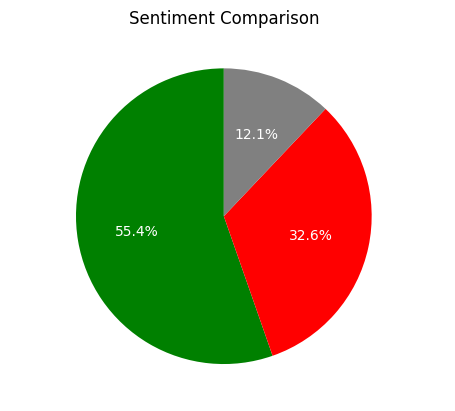

In [11]:

sentiment_counts = animals_df['Sentiment'].value_counts()

labels = ['Positive', 'Negative', 'Neutral']
sizes = [sentiment_counts['positive'], sentiment_counts['negative'], sentiment_counts['neutral']]
colors = ['green', 'red', 'gray']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'color': 'white'})

# add title
plt.title('Sentiment Comparison')

# display chart
plt.show()

In [12]:
map_months = clean_df['Datetime']
print(map_months)

0        2020-11-07 09:43:50
1        2021-06-17 12:22:51
2        2021-04-18 05:13:58
3        2021-01-06 19:13:01
4        2020-08-23 12:25:58
                ...         
24568    2020-06-27 09:46:48
24569    2021-02-16 17:17:02
24570    2020-09-12 03:54:58
24571    2020-11-04 20:08:31
24572    2021-01-04 04:55:11
Name: Datetime, Length: 24573, dtype: object


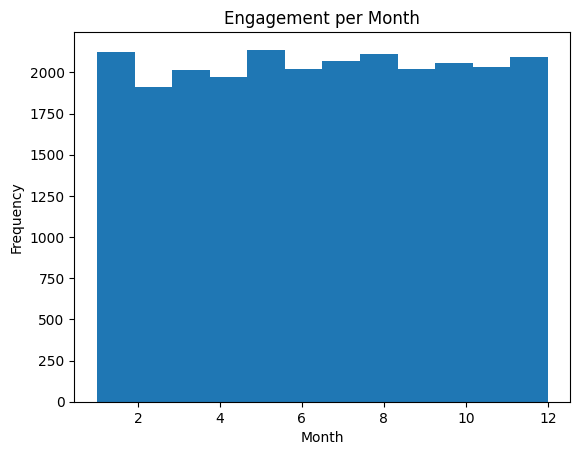

In [61]:
datetime = pd.to_datetime(map_months)

# create new series with month number
months = datetime.dt.month

# create histogram
fig, ax = plt.subplots()
ax.hist(months, bins=12)

# set x-axis and y-axis labels
ax.set_xlabel('Month')
ax.set_ylabel('Frequency')
# set title
ax.set_title('Engagement per Month')

# display histogram
plt.show()